In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split


# dataset
data = np.load("dataset2.npy", allow_pickle=True)

dataImages = data[:,0]
dataLabels = data[:,1].astype('uint8')

dataShape = (len(dataImages),)+dataImages[0].shape
print(dataShape)

a = np.empty(dataShape, dtype=np.uint8)

for i in range(len(dataImages)):
    a[i] = dataImages[i].astype('uint8')

dataImages = a

del a

(248, 326, 244, 3)


In [3]:
from sklearn.model_selection import train_test_split


# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.33, random_state=42)

classNames = ['Clean', 'Contaminated']

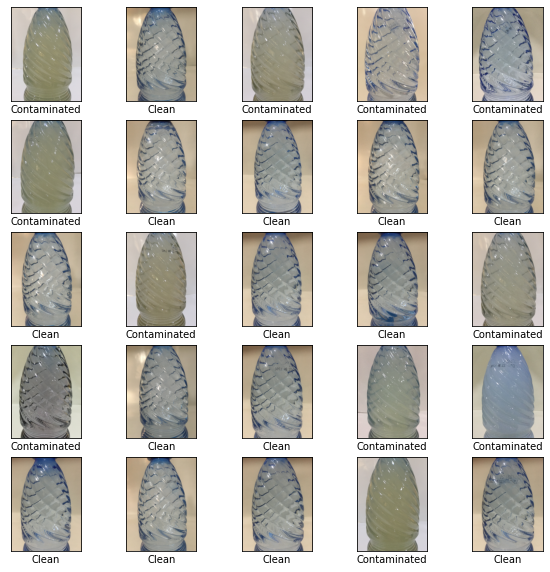

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [7]:
inputShape = trainImages[0].shape
print(inputShape)
outputShape = len(classNames)
print(outputShape)

(326, 244, 3)
2


In [8]:
from tensorflow.keras import datasets, layers, models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=inputShape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 324, 242, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 162, 121, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 119, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 59, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 78, 57, 64)        36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(outputShape))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 324, 242, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 162, 121, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 119, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 80, 59, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 78, 57, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 284544)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trainImages, trainLabels, epochs=10, 
                    validation_data=(testImages, testLabels))

Epoch 1/10
6/6 [==============================] - 44s 7s/step - loss: 2341.6230 - accuracy: 0.5301 - val_loss: 81.2090 - val_accuracy: 0.4390
Epoch 2/10
6/6 [==============================] - 32s 5s/step - loss: 25.9134 - accuracy: 0.5482 - val_loss: 7.7744 - val_accuracy: 0.4390
Epoch 3/10
6/6 [==============================] - 32s 5s/step - loss: 2.3931 - accuracy: 0.5542 - val_loss: 0.6866 - val_accuracy: 0.5732
Epoch 4/10
6/6 [==============================] - 36s 6s/step - loss: 0.6862 - accuracy: 0.6386 - val_loss: 0.6925 - val_accuracy: 0.4878
Epoch 5/10
6/6 [==============================] - 31s 5s/step - loss: 0.6906 - accuracy: 0.5663 - val_loss: 0.6898 - val_accuracy: 0.4512
Epoch 6/10
6/6 [==============================] - 32s 5s/step - loss: 4.7262 - accuracy: 0.6627 - val_loss: 0.6834 - val_accuracy: 0.5854
Epoch 7/10
6/6 [==============================] - 35s 6s/step - loss: 0.6583 - accuracy: 0.6145 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/10
6/6 [=============

3/3 - 4s - loss: 0.6920 - accuracy: 0.5732


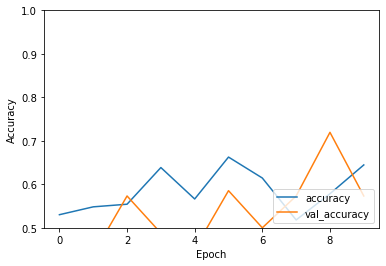

In [13]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)

In [ ]:
print(testAcc)